In [1]:
import os, pickle
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import evals.teaching_evals as evals
import pickle
import utils
y_train = np.array([0]*80+[1]*80)
y_valid = np.array([0]*20+[1]*20)

## load data

In [2]:
dwac = "embeds/bm/dwac_train_emb10.merged10.pkl"
resn = "embeds/bm/resn_train_emb10.pkl"
# TN_lpips = "embeds/bm/lpips/TN_train_emb10.pkl"
# MTL_lpips = "embeds/bm/lpips/MTL.BCETN_train_emb10.pkl"
TN_human = "embeds/bm/human/TN_train_emb10.pkl"
MTL_human = "embeds/bm/human/MTL.BCETN_train_emb10.pkl"

In [3]:
dwac = pickle.load(open(dwac, "rb"))
resn = pickle.load(open(resn,"rb"))
# TN_lpips = pickle.load(open(TN_lpips,"rb"))
# MTL_lpips = pickle.load(open(MTL_lpips,"rb"))
TN_human = pickle.load(open(TN_human,"rb"))
MTL_human = pickle.load(open(MTL_human,"rb"))

In [4]:
embeds = {"dwac": dwac, 
"resn": resn, 
# "TN_lpips": TN_lpips,
# "MTL_lpips":MTL_lpips,
"TN_human":TN_human,
"MTL_human": MTL_human}
legend = ['full', 'random', 'random_ci'] + list(embeds.keys())

## knn using human triplets

In [20]:
m_range = np.arange(3,21)
knn_dist = "htriplets"
full_score = evals.get_htriplet_knn_score()
random_scores = evals.get_random_knn_scores(knn_dist=knn_dist, m_range=m_range)

### protogreedy

In [21]:
protog_scores = [full_score, random_scores]
selection_alg = "protogreedy"
for model, embed in embeds.items():
    protog_scores.append(evals.get_prototype_knn_scores(embed, knn_dist=knn_dist, m_range=m_range, selection_alg=selection_alg))

[0.5, 0.5, 0.5, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.825, 0.825, 0.75, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]
[0.8, 0.775, 0.625, 0.675, 0.675, 0.675, 0.75, 0.75, 0.75, 0.75, 0.725, 0.75, 0.75, 0.775, 0.775, 0.775, 0.75, 0.75]
[0.7, 0.9, 0.9, 0.9, 0.875, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.825, 0.825, 0.825, 0.825, 0.825]
[0.775, 0.9, 0.875, 0.875, 0.875, 0.875, 0.9, 0.9, 0.9, 0.875, 0.875, 0.825, 0.825, 0.85, 0.85, 0.85, 0.85, 0.85]


### prototriplet

In [22]:
protot_scores = [full_score, random_scores]
selection_alg = "prototriplet"
for model, embed in embeds.items():
    print(model)
    protot_scores.append(evals.get_prototype_knn_scores(embed, knn_dist=knn_dist, m_range=m_range, selection_alg=selection_alg))

dwac
[0.5, 0.75, 0.75, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]
resn
[0.775, 0.775, 0.775, 0.775, 0.775, 0.775, 0.775, 0.775, 0.775, 0.825, 0.825, 0.825, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
TN_human
[0.325, 0.525, 0.55, 0.55, 0.575, 0.575, 0.575, 0.575, 0.6, 0.675, 0.675, 0.675, 0.675, 0.675, 0.675, 0.725, 0.725, 0.725]
MTL_human
[0.325, 0.525, 0.55, 0.55, 0.575, 0.575, 0.575, 0.575, 0.6, 0.675, 0.675, 0.675, 0.675, 0.675, 0.675, 0.725, 0.725, 0.725]


In [40]:

if True:
    SMALL_SIZE = 10
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 20
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=12)    # legend fontsize
    plt.rc('figure', titlesize=25)  # fontsize of the figure title
    colors = ["black", "","red", "blue", "green","yellow"]
    linewidth = 2

color_list = ['k','y','m','g','c','r','b','lime']
marker_list = ['o','s','^','x','d','p','*','8']
linestyle_list = ['solid','solid','dashdot','dotted','solid','dashed','dashdot','dotted']
def vis_all_knn_scores(m_range, allall_scores, subtitles=None, legend=None, title=None, save=False, save_dir=None):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    for j, all_scores in enumerate(allall_scores):
        for i, scores in enumerate(all_scores):
            if i == 0:
                full_knn_score = scores    
                ax[j].axhline(full_knn_score, linewidth=linewidth, c="black",markersize=3,linestyle="solid",label=model,marker=marker_list[i])
            elif i == 1:
                random_knn_scores, random_knn_ci = scores
                ax[j].plot(m_range, random_knn_scores, linewidth=linewidth, markersize=3,linestyle="solid",label=model,marker=marker_list[i])
                ax[j].fill_between(m_range, random_knn_scores + random_knn_ci / 2, random_knn_scores - random_knn_ci / 2, alpha=0.5)
            else:
                ax[j].plot(m_range, scores, linewidth=linewidth, markersize=3,linestyle="solid",label=model,marker=marker_list[i])

        if subtitles: ax[j].set_title(subtitles[j])
    if legend: ax[1].legend(legend)

    if not title:
        title = "knn_scores"
    fig.suptitle(title, fontsize=30)
    if save:
        if not save_dir: save_dir = f"figs/{title}.png"
        plt.savefig(save_dir)

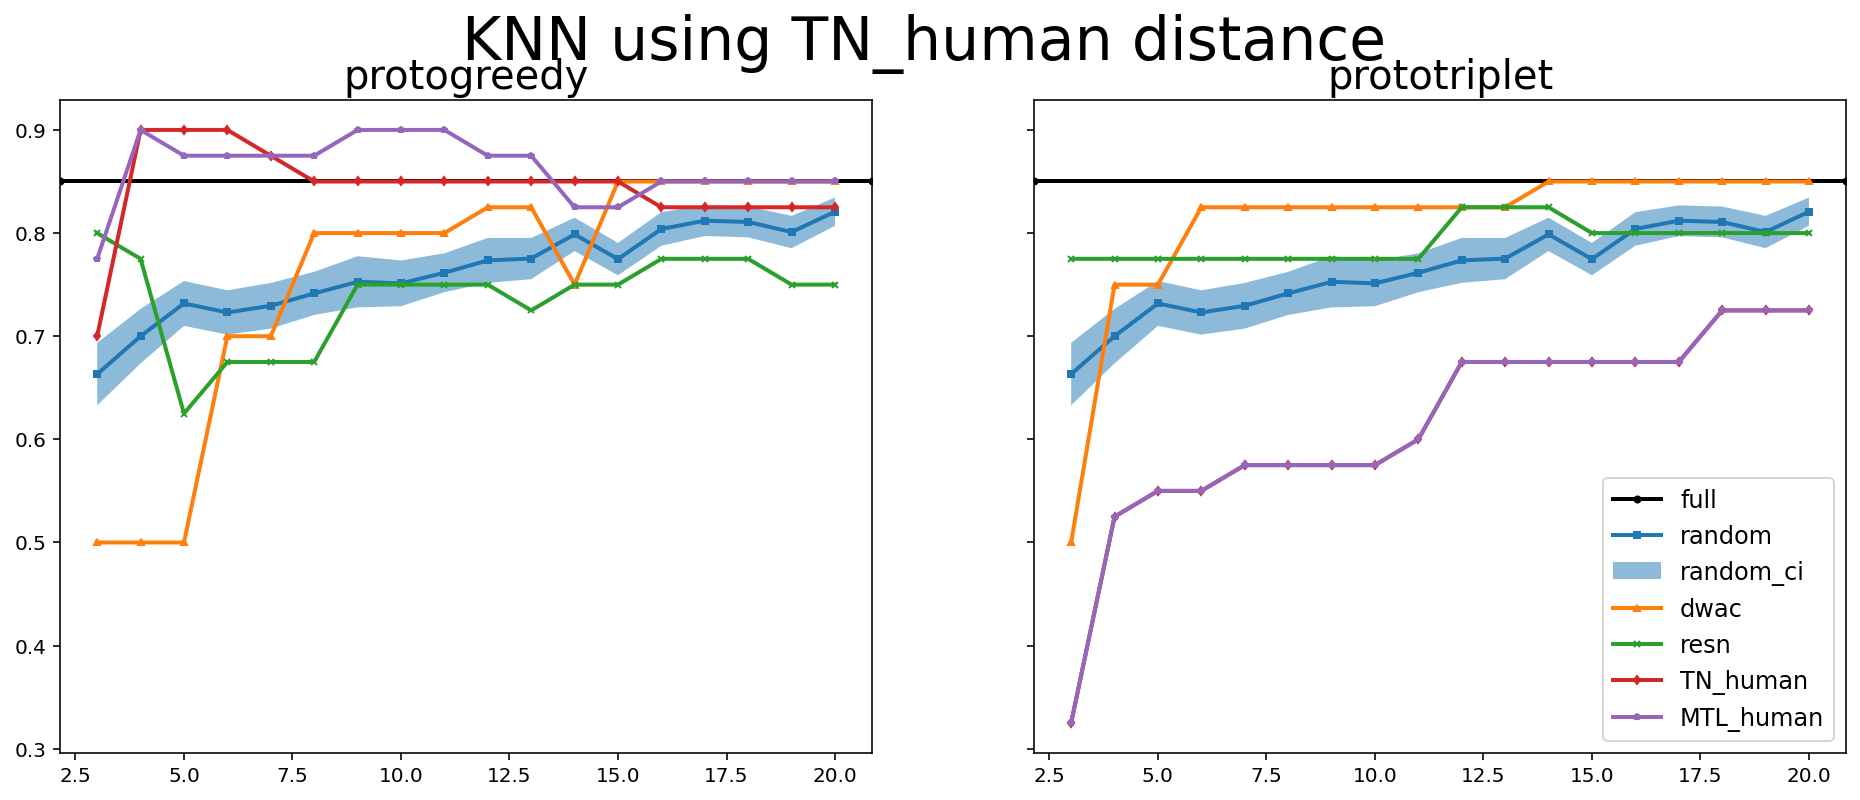

In [42]:
vis_all_knn_scores(m_range, [protog_scores, protot_scores], ["protogreedy","prototriplet"], legend, title="KNN using TN_human distance", save=True)